In [149]:
%pip install --upgrade pip
%pip install xgboost scikit-learn kagglehub jupyter ipykernel ipywidgets lightgbm seaborn
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
pd.set_option('display.max_rows', None) 

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [150]:
import kagglehub
data_path = kagglehub.dataset_download('mahdiehhajian/bank-marketing')+ '/bank/bank-full.csv'
print(data_path)
dataset = pd.read_csv(data_path, sep=';')
df=dataset.copy()

/home/ghost/.cache/kagglehub/datasets/mahdiehhajian/bank-marketing/versions/1/bank/bank-full.csv


In [151]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [153]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [154]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [155]:
df['job'].value_counts()

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

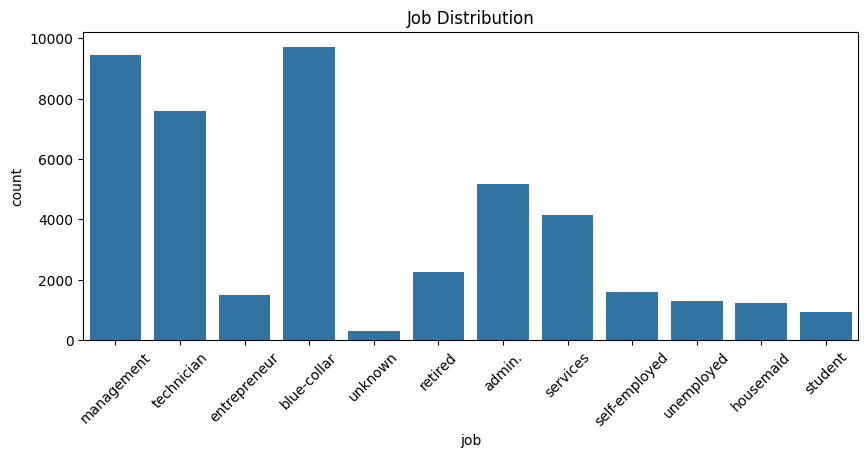

In [156]:
plt.figure(figsize=(10, 4))
sns.countplot(x=df['job'])
plt.xticks(rotation=45)
plt.title("Job Distribution")
plt.show()

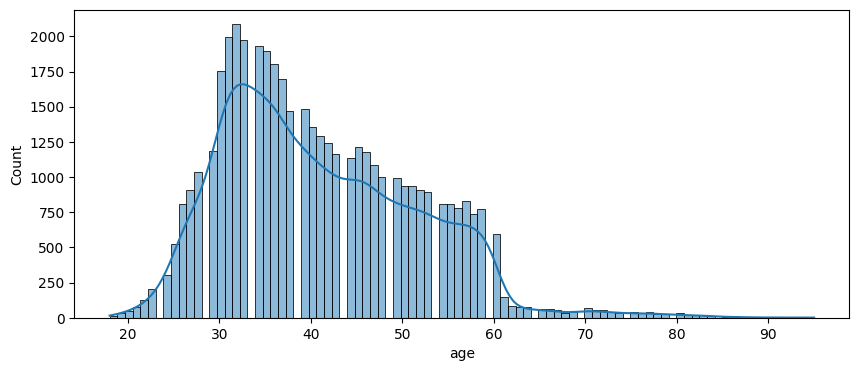

In [157]:
plt.figure(figsize=(10,4))
sns.histplot(df['age'], kde=True)
plt.show()

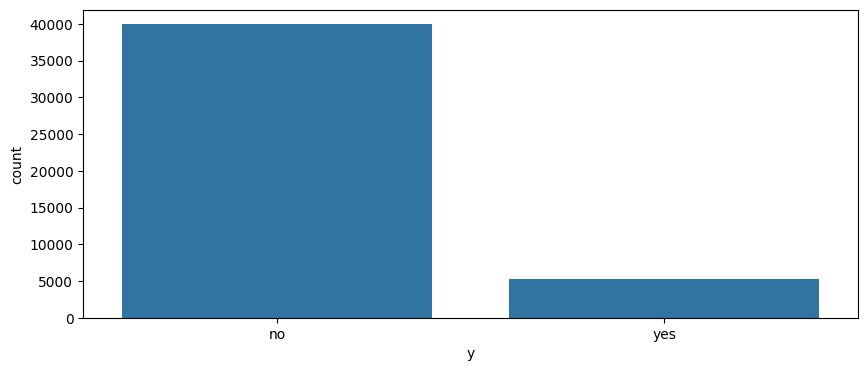

In [158]:
plt.figure(figsize=(10,4))
sns.countplot(x=df['y'])
plt.show()

In [159]:
unknown_counts = df.apply(lambda x: x[x == 'unknown'].count())
total_counts = df.shape[0]
unknown_percentage = (unknown_counts / total_counts) * 100
print(unknown_counts)

age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     36959
y                0
dtype: int64


In [160]:
df.shape

(45211, 17)

In [161]:
df.contact.value_counts()

contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64

In [162]:
df.poutcome.value_counts()

poutcome
unknown    36959
failure     4901
other       1840
success     1511
Name: count, dtype: int64

In [163]:
df.drop(df[df['education'] == 'unknown'].index, inplace=True)
df.drop(df[df['job'] == 'unknown'].index, inplace=True)

In [164]:
df['y'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)
df['y'].value_counts()

y
0    38172
1     5021
Name: count, dtype: int64

In [165]:
df['job'] = df['job'].map({
    'admin.': 0, 'blue-collar': 1, 'entrepreneur': 2, 'housemaid': 3,
    'management': 4, 'retired': 5, 'self-employed': 6, 'services': 7,
    'student': 8, 'technician': 9, 'unemployed': 10})
df['marital'] = df['marital'].map({'married': 0, 'single': 1, 'divorced': 2})

In [166]:
month_mapping = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
    'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}
df['month'] = df['month'].map(month_mapping)

In [167]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,0,tertiary,no,2143,yes,no,unknown,5,5,261,1,-1,0,unknown,0
1,44,9,1,secondary,no,29,yes,no,unknown,5,5,151,1,-1,0,unknown,0
2,33,2,0,secondary,no,2,yes,yes,unknown,5,5,76,1,-1,0,unknown,0
5,35,4,0,tertiary,no,231,yes,no,unknown,5,5,139,1,-1,0,unknown,0
6,28,4,1,tertiary,no,447,yes,yes,unknown,5,5,217,1,-1,0,unknown,0


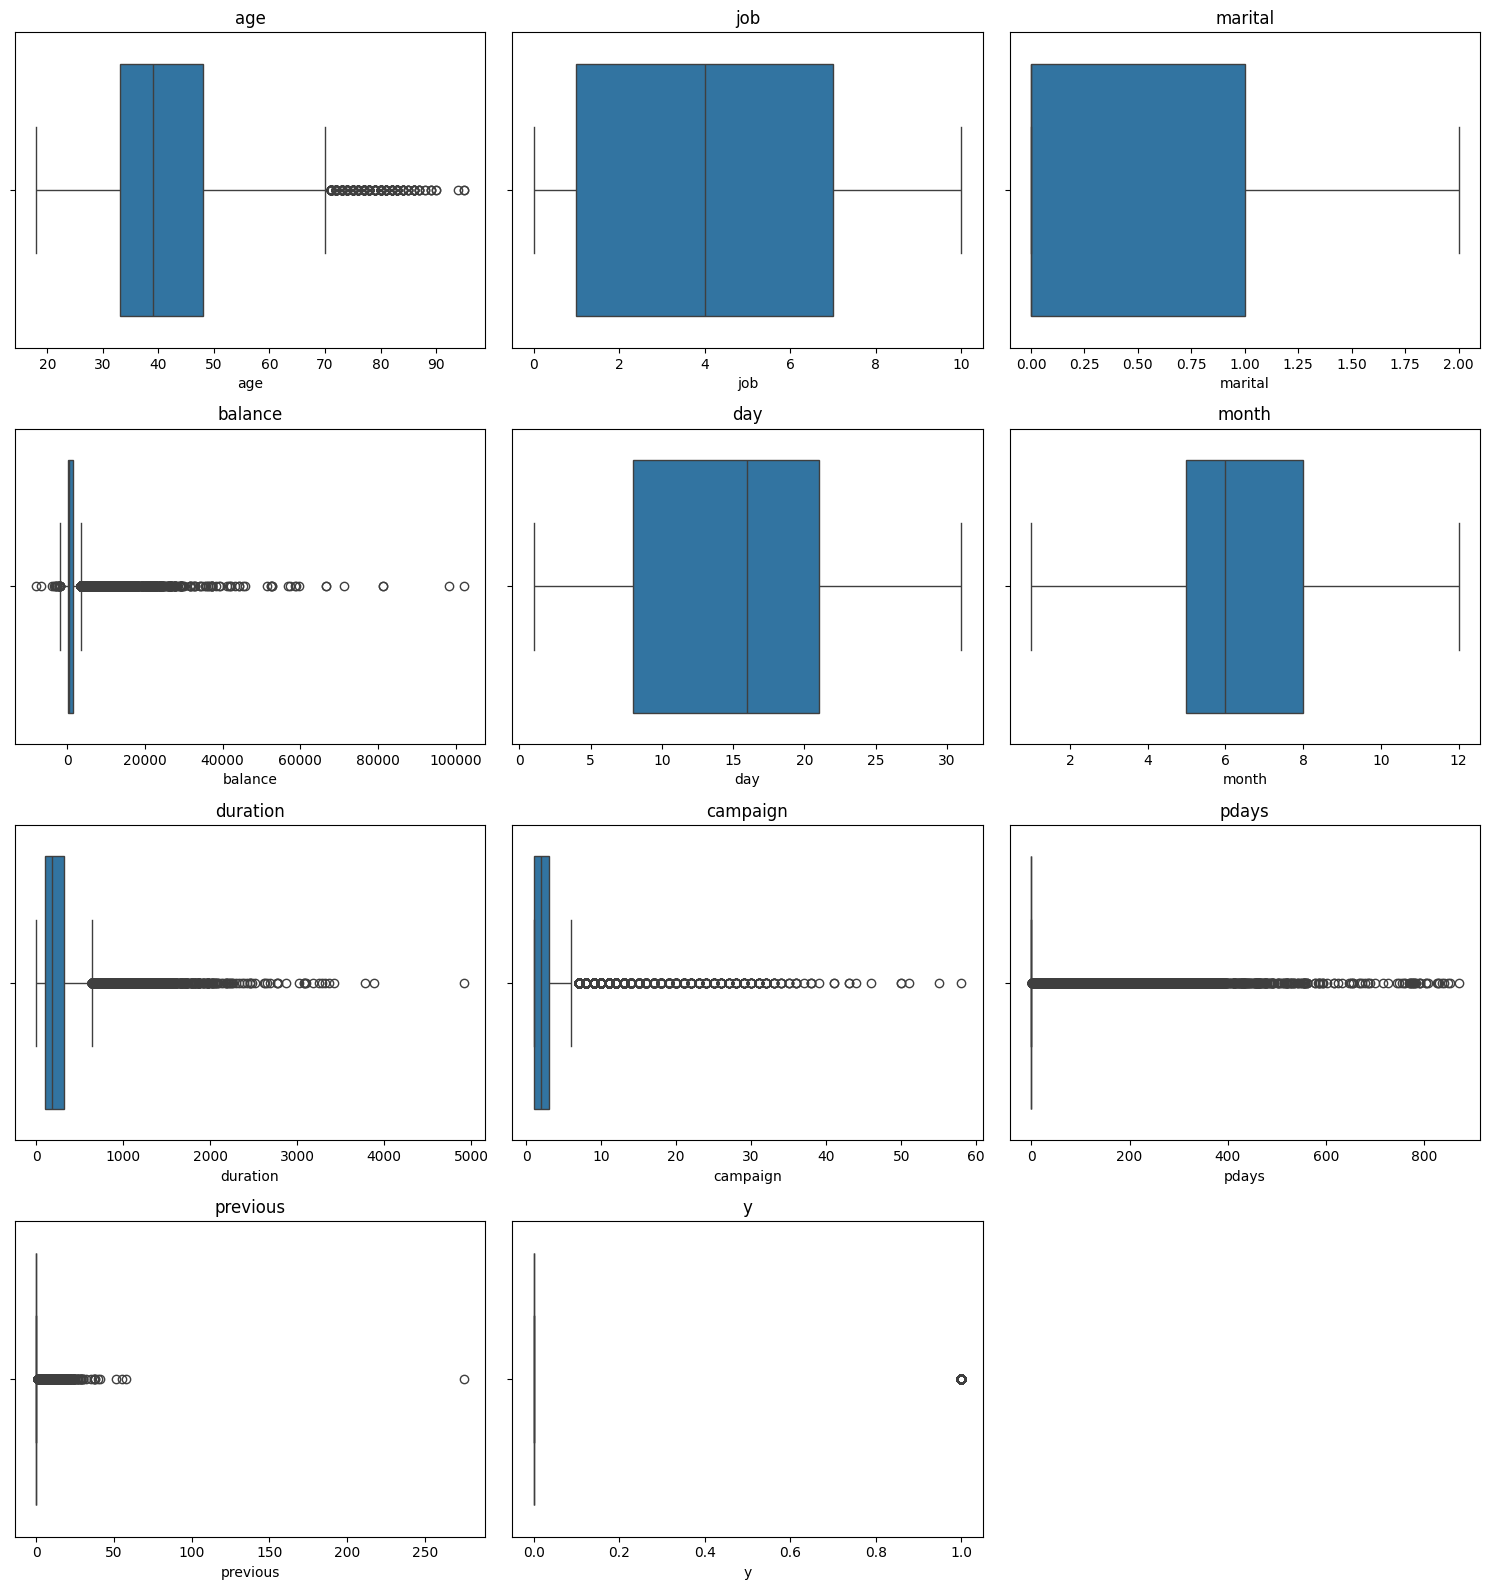

In [168]:
# Plot boxplots for each numeric column in the dataframe
numeric_cols = df.select_dtypes(include=np.number).columns

num_plots = len(numeric_cols)
num_cols = 3  # number of plots per row
num_rows = (num_plots + num_cols - 1) // num_cols

plt.figure(figsize=(5 * num_cols, 4 * num_rows))
for i, col in enumerate(numeric_cols):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(x=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

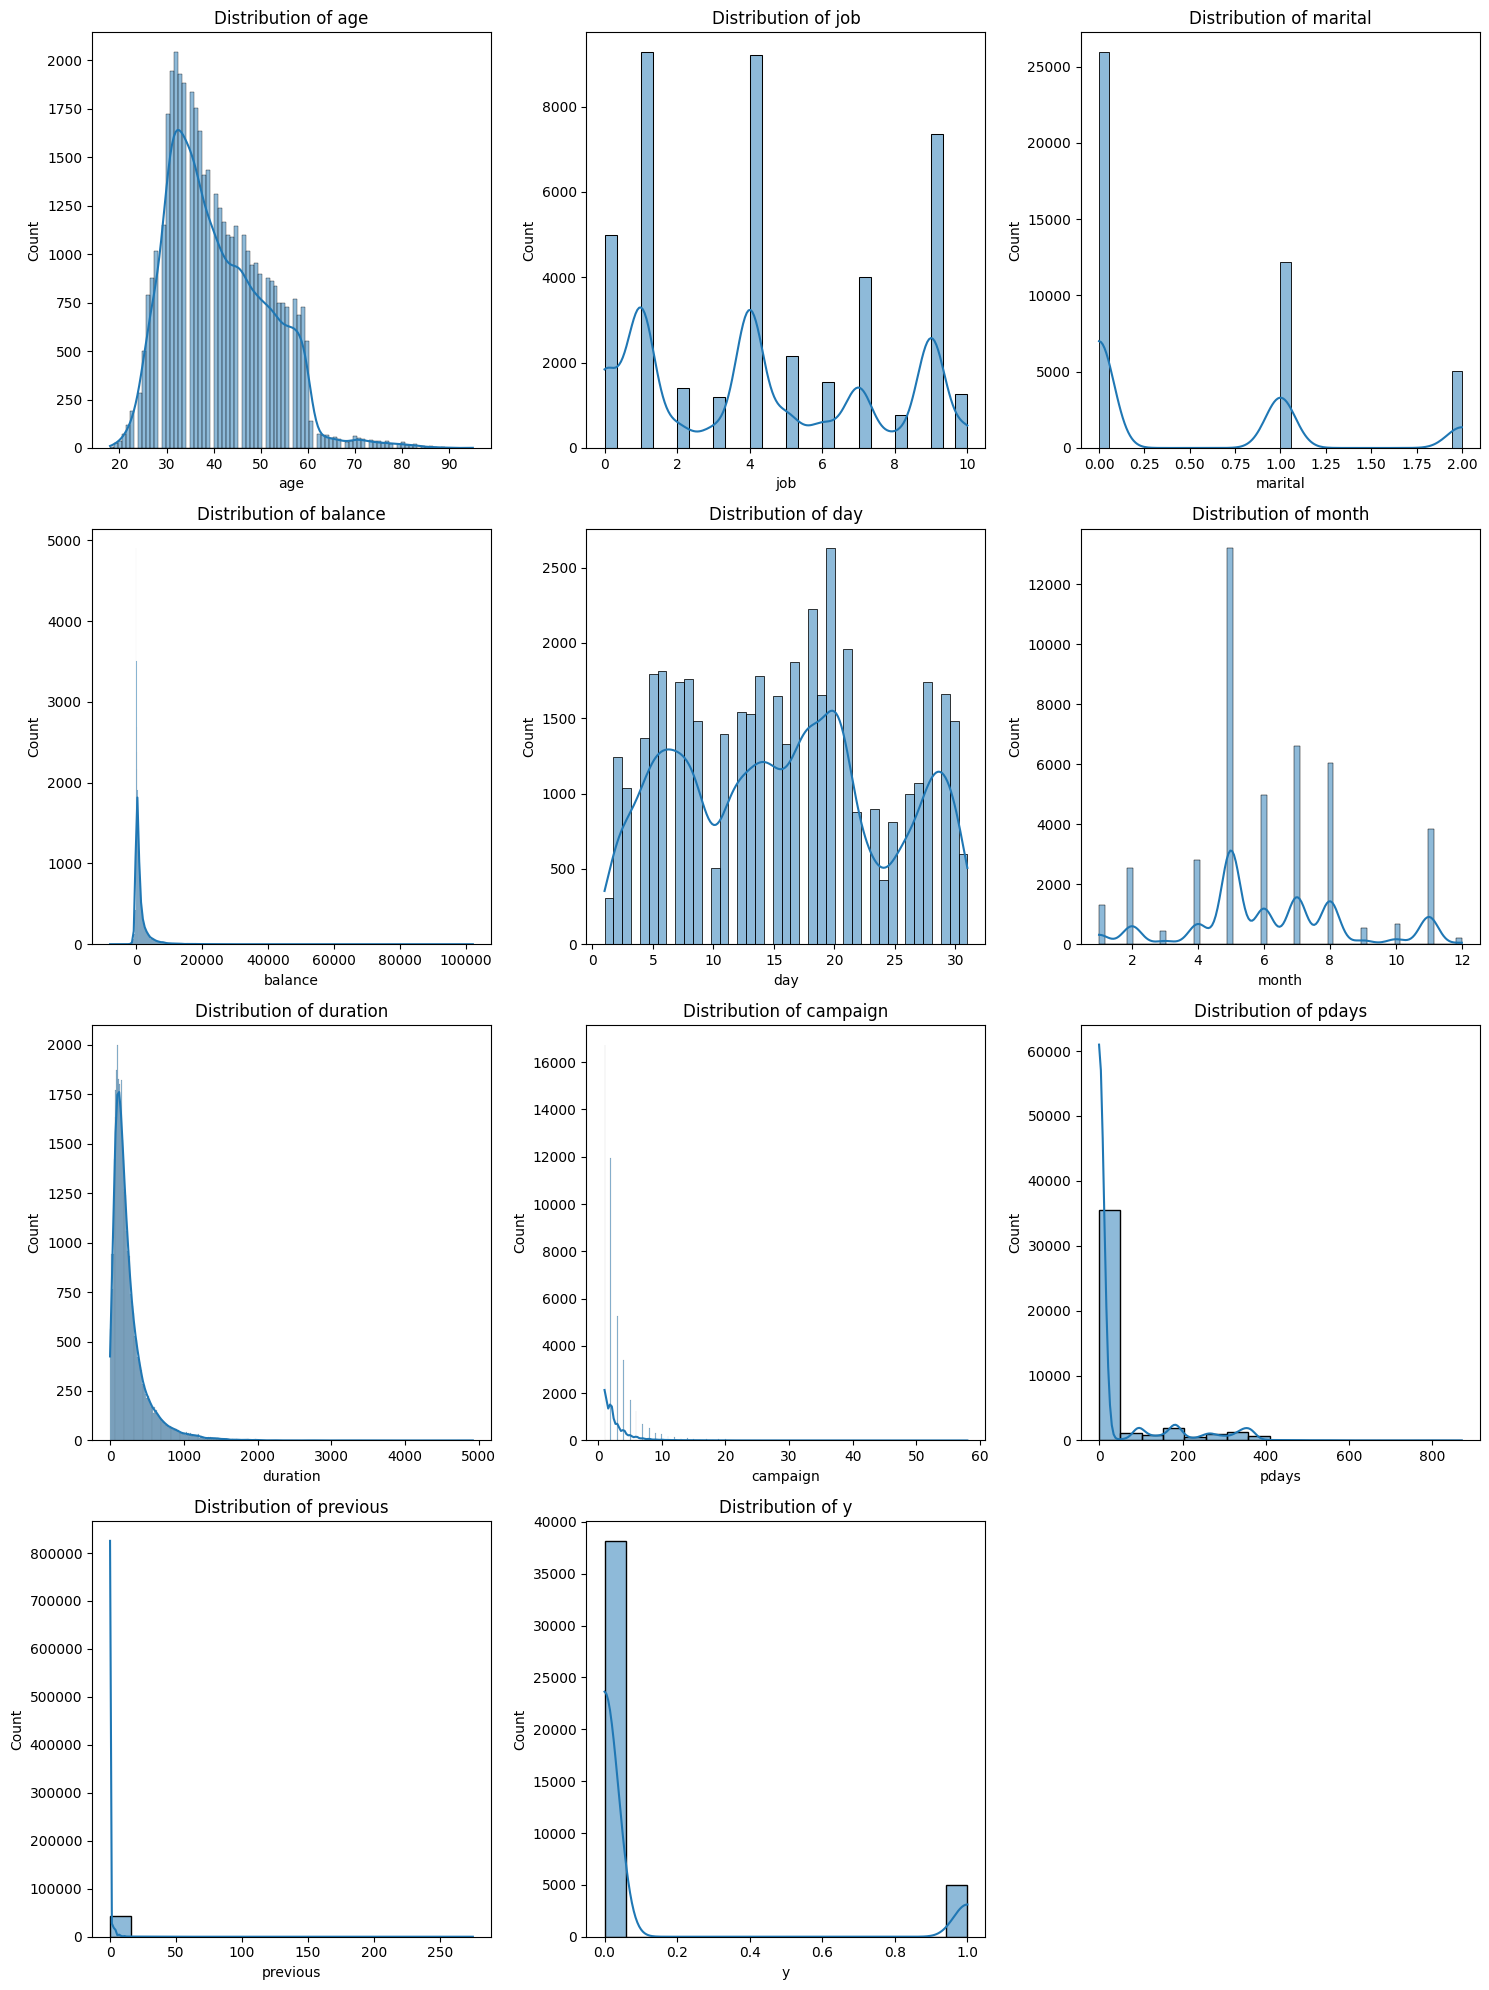

In [169]:
# Get numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns

# Create subplots for each numeric column
num_cols = len(numeric_cols)
num_cols_per_row = 3
num_rows = (num_cols + num_cols_per_row - 1) // num_cols_per_row

plt.figure(figsize=(15, 5 * num_rows))

for idx, col in enumerate(numeric_cols, 1):
    plt.subplot(num_rows, num_cols_per_row, idx)
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

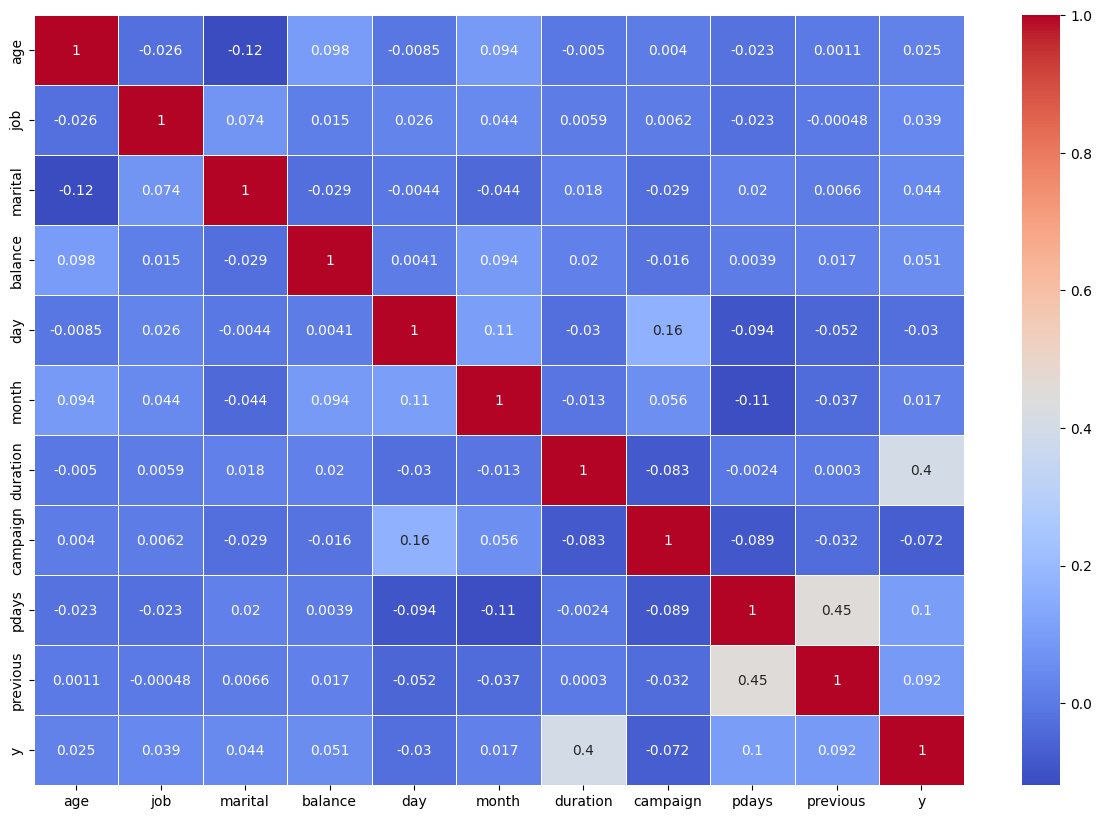

In [170]:
plt.figure(figsize=(15,10))
numeric_df = df.select_dtypes(include=np.number) # Now np is recognized
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

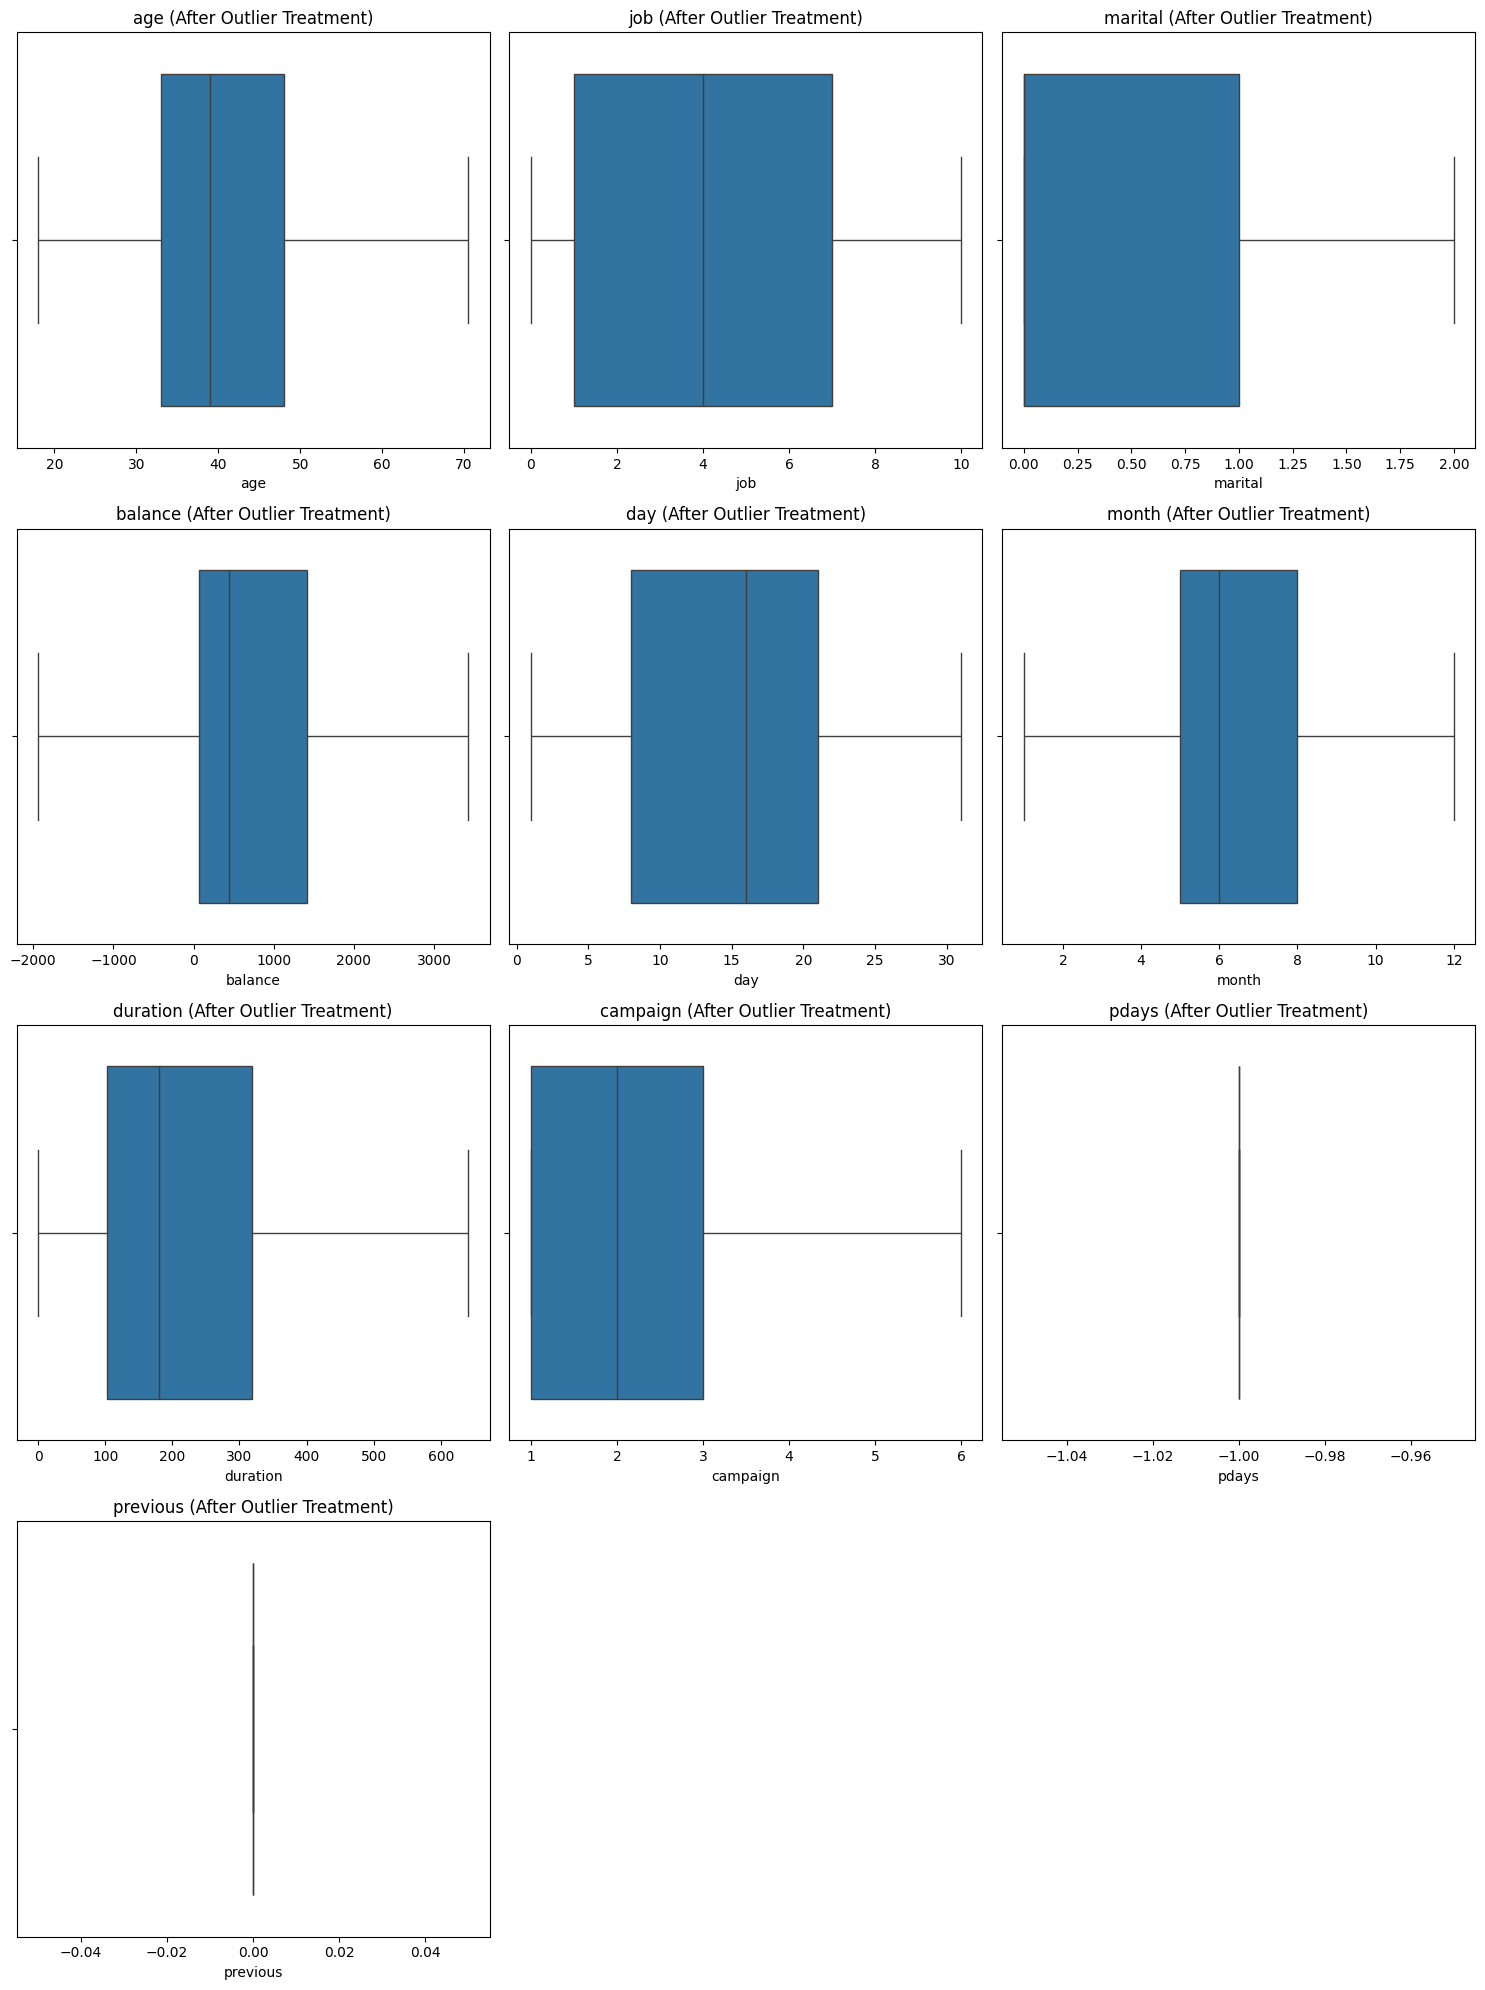

In [171]:
# Get numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns

# Function to handle outliers using IQR method
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    return df

# Handle outliers for each numeric column
for col in numeric_cols:
    if col != 'y':  # Skip the target variable
        df = handle_outliers(df, col)

# Plot boxplots after handling outliers
plt.figure(figsize=(15, 5 * ((len(numeric_cols)-1)//3 + 1)))
for i, col in enumerate(numeric_cols):
    if col != 'y':  # Skip the target variable
        plt.subplot((len(numeric_cols)-1)//3 + 1, 3, i+1)
        sns.boxplot(x=df[col])
        plt.title(f'{col} (After Outlier Treatment)')

plt.tight_layout()
plt.show()

In [172]:
# Identify numeric columns excluding the target variable 'y'
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
if 'y' in numeric_cols:
    numeric_cols.remove('y')

# Compute skewness of numeric columns
skewness_before = df[numeric_cols].skew()
print("Skewness before log-transform:\n", skewness_before)

# Select columns with high skewness (threshold can be adjusted)
skewed_cols = skewness_before[abs(skewness_before) > 0.75].index
print("\nColumns to be log-transformed:", list(skewed_cols))

# Apply log1p transformation to reduce skewness
for col in skewed_cols:
    # Ensure no negative values or zero if using log transformation
    if (df[col] < 0).any():
        print(f"Column {col} has negative values. Skipping log transformation.")
    else:
        df[col] = np.log1p(df[col])

# Compute skewness after transformation
skewness_after = df[skewed_cols].skew()
print("\nSkewness after log-transform:\n", skewness_after)

Skewness before log-transform:
 age         0.551260
job         0.256737
marital     0.985651
balance     1.093016
day         0.089800
month       0.244920
duration    1.034068
campaign    1.095941
pdays       0.000000
previous    0.000000
dtype: float64

Columns to be log-transformed: ['marital', 'balance', 'duration', 'campaign']
Column balance has negative values. Skipping log transformation.

Skewness after log-transform:
 marital     0.674966
balance     1.093016
duration   -0.743343
campaign    0.575336
dtype: float64


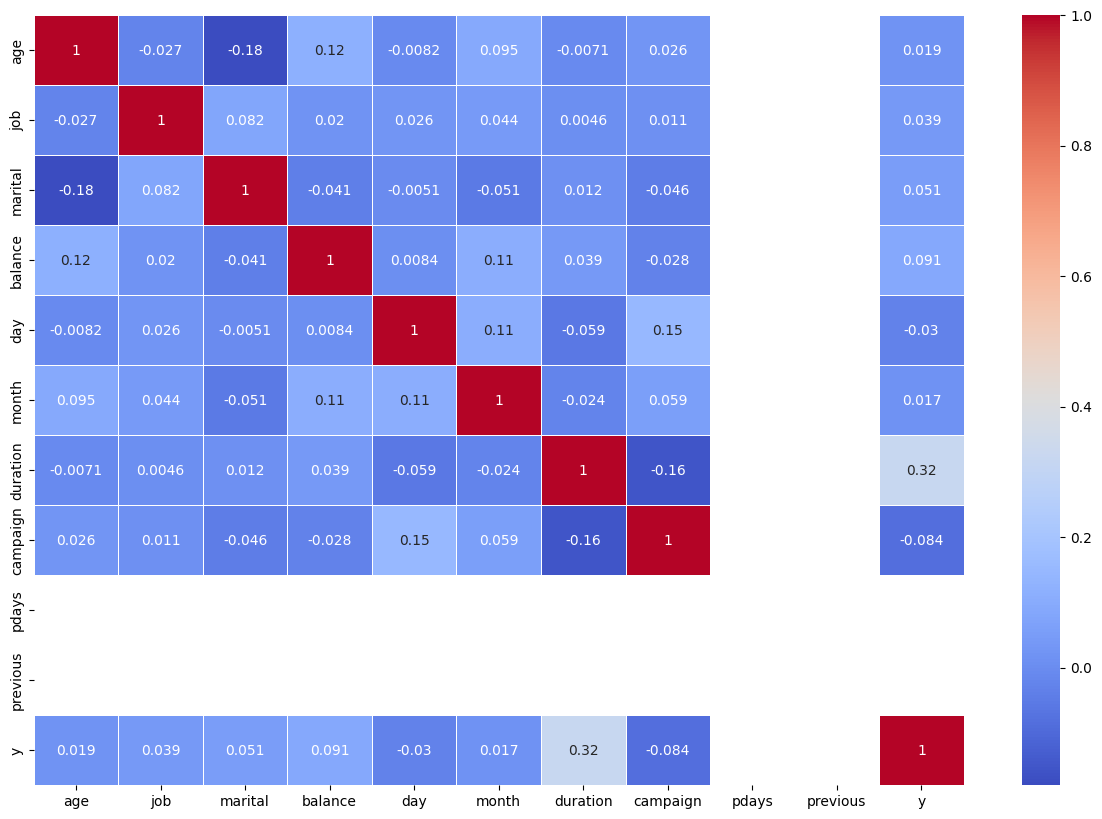

In [173]:
plt.figure(figsize=(15,10))
numeric_df = df.select_dtypes(include=np.number) # Now np is recognized
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

In [174]:
X = df.drop('y', axis=1)
y = df['y']

In [175]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape) 

(34554, 16) (8639, 16) (34554,) (8639,)


In [176]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
df['month'] = df['month'].map(month_mapping).fillna(0).astype(int)

X = df.drop('y', axis=1)
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logistic_regression = LogisticRegression(max_iter=2000, random_state=42)
logistic_regression.fit(X_train_scaled, y_train)
y_pred_lr = logistic_regression.predict(X_test_scaled)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
class_report_lr = classification_report(y_test, y_pred_lr)

print('Logistic Regression Accuracy:', accuracy_lr)
print('Confusion Matrix:\n', conf_matrix_lr)
print('Classification Report:\n', class_report_lr) 

Logistic Regression Accuracy: 0.8903808311147123
Confusion Matrix:
 [[7502  156]
 [ 791  190]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94      7658
           1       0.55      0.19      0.29       981

    accuracy                           0.89      8639
   macro avg       0.73      0.59      0.61      8639
weighted avg       0.86      0.89      0.87      8639



In [177]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.901840490797546


In [178]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_accuracy

0.8996411621715477

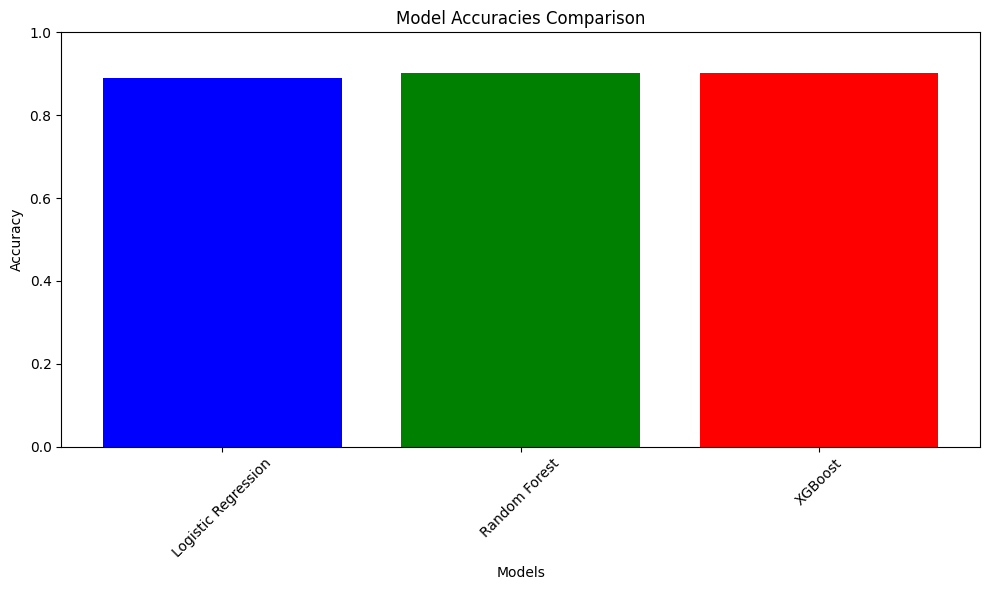

Logistic Regression Accuracy: 0.8904
Random Forest Accuracy: 0.9023
XGBoost Accuracy: 0.9018


In [179]:
# Comparing model accuracies
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

# Train and evaluate Logistic Regression
logistic_regression = LogisticRegression(max_iter=2000, random_state=42)
logistic_regression.fit(X_train_scaled, y_train)
y_pred_lr = logistic_regression.predict(X_test_scaled)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

# Train and evaluate Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

# Train and evaluate XGBoost
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_model.predict(X_test_scaled)
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)

# Create dictionary of model accuracies
model_accuracies = {
    'Logistic Regression': accuracy_lr,
    'Random Forest': rf_accuracy,
    'XGBoost': xgb_accuracy
}

# Plot the results
plt.figure(figsize=(10, 6))
plt.bar(model_accuracies.keys(), model_accuracies.values(), color=['blue', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracies Comparison')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print numerical results
for model, accuracy in model_accuracies.items():
    print(f"{model} Accuracy: {accuracy:.4f}")


In [180]:
class_report_lr = classification_report(y_test, y_pred_lr)
print('Logistic Regression Classification Report:\n', class_report_lr)

rf_class_report = classification_report(y_test, y_pred_rf)
print('Random Forest Classifier Classification Report:\n', rf_class_report)

xgb_class_report = classification_report(y_test, y_pred_xgb)
print('XGBoost Classifier Classification Report:\n', xgb_class_report) 

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94      7658
           1       0.55      0.19      0.29       981

    accuracy                           0.89      8639
   macro avg       0.73      0.59      0.61      8639
weighted avg       0.86      0.89      0.87      8639

Random Forest Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95      7658
           1       0.61      0.37      0.47       981

    accuracy                           0.90      8639
   macro avg       0.77      0.67      0.71      8639
weighted avg       0.89      0.90      0.89      8639

XGBoost Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.95      7658
           1       0.59      0.43      0.50       981

    accuracy                           0.90   

In [181]:
from sklearn.neighbors import KNeighborsClassifier

# K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)  # Fit the model on training data
y_pred_knn = knn_model.predict(X_test)  # Make predictions on the test set

# Evaluate the KNN model
knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_conf_matrix = confusion_matrix(y_test, y_pred_knn)
knn_class_report = classification_report(y_test, y_pred_knn)
print("Predicted labels (ada):",y_pred_knn)

# Print KNN results
print('K-Nearest Neighbors (KNN) Accuracy:', knn_accuracy)
print('Confusion Matrix (KNN):\n', knn_conf_matrix)
print('Classification Report (KNN):\n', knn_class_report) 
print("\nSample predictions: ",y_pred_knn[:10])

Predicted labels (ada): [0 0 0 ... 0 0 0]
K-Nearest Neighbors (KNN) Accuracy: 0.8762588262530385
Confusion Matrix (KNN):
 [[7478  180]
 [ 889   92]]
Classification Report (KNN):
               precision    recall  f1-score   support

           0       0.89      0.98      0.93      7658
           1       0.34      0.09      0.15       981

    accuracy                           0.88      8639
   macro avg       0.62      0.54      0.54      8639
weighted avg       0.83      0.88      0.84      8639


Sample predictions:  [0 0 0 0 0 0 0 0 0 0]


In [182]:
from sklearn.svm import SVC

# Support Vector Machine (SVM)
svm_model = SVC(random_state=42)
svm_model.fit(X_train_scaled, y_train)  # Fit the model on scaled training data
y_pred_svm = svm_model.predict(X_test_scaled)  # Make predictions on scaled test set

# Evaluate the SVM model
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_conf_matrix = confusion_matrix(y_test, y_pred_svm)
svm_class_report = classification_report(y_test, y_pred_svm)
print("Predicted labels (ada):",y_pred_svm)

# Print SVM results
print('Support Vector Machine (SVM) Accuracy:', svm_accuracy)
print('Confusion Matrix (SVM):\n', svm_conf_matrix)
print('Classification Report (SVM):\n', svm_class_report)
print("\nSample predictions: ",y_pred_svm[:10])

Predicted labels (ada): [0 0 0 ... 0 0 0]
Support Vector Machine (SVM) Accuracy: 0.8952425049195508
Confusion Matrix (SVM):
 [[7581   77]
 [ 828  153]]
Classification Report (SVM):
               precision    recall  f1-score   support

           0       0.90      0.99      0.94      7658
           1       0.67      0.16      0.25       981

    accuracy                           0.90      8639
   macro avg       0.78      0.57      0.60      8639
weighted avg       0.87      0.90      0.87      8639


Sample predictions:  [0 0 0 0 0 1 0 0 0 0]


In [183]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)  # Fit the model on training data
y_pred_dt = dt_model.predict(X_test)  # Make predictions on the test set

# Evaluate the Decision Tree model
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_conf_matrix = confusion_matrix(y_test, y_pred_dt)
dt_class_report = classification_report(y_test, y_pred_dt)
print("Predicted labels (ada):",y_pred_dt)

# Print Decision Tree results
print('Decision Tree Classifier Accuracy:', dt_accuracy)
print('Confusion Matrix (Decision Tree):\n', dt_conf_matrix)
print('Classification Report (Decision Tree):\n', dt_class_report)
print("\nSample predictions: ",y_pred_dt[:10])

Predicted labels (ada): [0 0 0 ... 0 0 0]
Decision Tree Classifier Accuracy: 0.86352587104989
Confusion Matrix (Decision Tree):
 [[7052  606]
 [ 573  408]]
Classification Report (Decision Tree):
               precision    recall  f1-score   support

           0       0.92      0.92      0.92      7658
           1       0.40      0.42      0.41       981

    accuracy                           0.86      8639
   macro avg       0.66      0.67      0.67      8639
weighted avg       0.87      0.86      0.86      8639


Sample predictions:  [0 0 0 0 0 0 0 0 0 1]


In [184]:
from sklearn.naive_bayes import GaussianNB

# Naive Bayes Classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)  # Fit the model on training data
y_pred_nb = nb_model.predict(X_test)  # Make predictions on the test set

# Evaluate the Naive Bayes model
nb_accuracy = accuracy_score(y_test, y_pred_nb)
nb_conf_matrix = confusion_matrix(y_test, y_pred_nb)
nb_class_report = classification_report(y_test, y_pred_nb)
print("Predicted labels (ada):",y_pred_nb)

# Print Naive Bayes results
print('Naive Bayes Classifier Accuracy:', nb_accuracy)
print('Confusion Matrix (Naive Bayes):\n', nb_conf_matrix)
print('Classification Report (Naive Bayes):\n', nb_class_report)
print("\nSample predictions: ", y_pred_nb[:10]) 

Predicted labels (ada): [1 0 0 ... 0 0 0]
Naive Bayes Classifier Accuracy: 0.8612107882856812
Confusion Matrix (Naive Bayes):
 [[6975  683]
 [ 516  465]]
Classification Report (Naive Bayes):
               precision    recall  f1-score   support

           0       0.93      0.91      0.92      7658
           1       0.41      0.47      0.44       981

    accuracy                           0.86      8639
   macro avg       0.67      0.69      0.68      8639
weighted avg       0.87      0.86      0.87      8639


Sample predictions:  [1 0 0 0 0 1 0 1 0 0]


In [185]:
from xgboost import XGBClassifier

# XGBoost Model
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)  # Fit the model on training data
y_pred_xgb = xgb_model.predict(X_test)  # Make predictions on the test set

# Evaluate the XGBoost model
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
xgb_conf_matrix = confusion_matrix(y_test, y_pred_xgb)
xgb_class_report = classification_report(y_test, y_pred_xgb)
print("Predicted labels (XGB):", y_pred_xgb)

# Print XGBoost results
print('XGBoost Accuracy:', xgb_accuracy)
print('Confusion Matrix (XGBoost):\n', xgb_conf_matrix)
print('Classification Report (XGBoost):\n', xgb_class_report)
print("\nSample predictions: ", y_pred_xgb[:10]) 

Predicted labels (XGB): [0 0 0 ... 0 0 0]
XGBoost Accuracy: 0.901840490797546
Confusion Matrix (XGBoost):
 [[7373  285]
 [ 563  418]]
Classification Report (XGBoost):
               precision    recall  f1-score   support

           0       0.93      0.96      0.95      7658
           1       0.59      0.43      0.50       981

    accuracy                           0.90      8639
   macro avg       0.76      0.69      0.72      8639
weighted avg       0.89      0.90      0.89      8639


Sample predictions:  [0 0 0 0 0 1 0 0 0 0]


In [186]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# QDA Model
qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(X_train, y_train)  # Fit the model on training data
y_pred_qda = qda_model.predict(X_test)  # Make predictions on the test set

# Evaluate the QDA model
qda_accuracy = accuracy_score(y_test, y_pred_qda)
qda_conf_matrix = confusion_matrix(y_test, y_pred_qda)
qda_class_report = classification_report(y_test, y_pred_qda)

# Print the predicted labels (either 0 or 1)
print("Predicted labels (QDA):", y_pred_qda)

# Print QDA results
print('QDA Accuracy:', qda_accuracy)
print('Confusion Matrix (QDA):\n', qda_conf_matrix)
print('Classification Report (QDA):\n', qda_class_report)

# Optionally, you can print a sample of predictions to show the predicted labels (0 or 1)
print("\nSample predictions: ", y_pred_qda[:10])  # Show the first 10 predictions


Predicted labels (QDA): [0 0 0 ... 0 0 0]
QDA Accuracy: 0.8864451904155574
Confusion Matrix (QDA):
 [[7658    0]
 [ 981    0]]
Classification Report (QDA):
               precision    recall  f1-score   support

           0       0.89      1.00      0.94      7658
           1       0.00      0.00      0.00       981

    accuracy                           0.89      8639
   macro avg       0.44      0.50      0.47      8639
weighted avg       0.79      0.89      0.83      8639


Sample predictions:  [0 0 0 0 0 0 0 0 0 0]


/home/ghost/Documents/CODE/myenv/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/ghost/Documents/CODE/myenv/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/ghost/Documents/CODE/myenv/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:1052: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/home/ghost/Documents/CODE/myenv/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:1052: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/home/ghost/Documents/CODE/myenv/lib/python3.9/site-packages/sklearn/discriminant_anal

In [187]:
from sklearn.ensemble import GradientBoostingClassifier

# Gradient Boosting Model
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)  # Fit the model on training data
y_pred_gb = gb_model.predict(X_test)  # Make predictions on the test set

# Evaluate the Gradient Boosting model
gb_accuracy = accuracy_score(y_test, y_pred_gb)
gb_conf_matrix = confusion_matrix(y_test, y_pred_gb)
gb_class_report = classification_report(y_test, y_pred_gb)

# Print the predicted labels (either 0 or 1)
print("Predicted labels (GB):", y_pred_gb)

# Print Gradient Boosting results
print('Gradient Boosting Accuracy:', gb_accuracy)
print('Confusion Matrix (GB):\n', gb_conf_matrix)
print('Classification Report (GB):\n', gb_class_report)

# Optionally, you can print a sample of predictions to show the predicted labels (0 or 1)
print("\nSample predictions: ", y_pred_gb[:10])  # Show the first 10 predictions

Predicted labels (GB): [0 0 0 ... 0 0 0]
Gradient Boosting Accuracy: 0.9024192614885982
Confusion Matrix (GB):
 [[7439  219]
 [ 624  357]]
Classification Report (GB):
               precision    recall  f1-score   support

           0       0.92      0.97      0.95      7658
           1       0.62      0.36      0.46       981

    accuracy                           0.90      8639
   macro avg       0.77      0.67      0.70      8639
weighted avg       0.89      0.90      0.89      8639


Sample predictions:  [0 0 0 0 0 1 0 0 0 0]


In [188]:
from sklearn.ensemble import AdaBoostClassifier

# AdaBoost Model
ada_model = AdaBoostClassifier()
ada_model.fit(X_train, y_train)  # Fit the model on training data
y_pred_ada = ada_model.predict(X_test)  # Make predictions on the test set

# Evaluate the AdaBoost model
ada_accuracy = accuracy_score(y_test, y_pred_ada)
ada_conf_matrix = confusion_matrix(y_test, y_pred_ada)
ada_class_report = classification_report(y_test, y_pred_ada)

# Print the predicted labels (either 0 or 1)
print("Predicted labels (AdaBoost):", y_pred_ada)

# Print AdaBoost results
print('AdaBoost Accuracy:', ada_accuracy)
print('Confusion Matrix (AdaBoost):\n', ada_conf_matrix)
print('Classification Report (AdaBoost):\n', ada_class_report)

# Optionally, you can print a sample of predictions to show the predicted labels (0 or 1)
print("\nSample predictions: ", y_pred_ada[:10])  # Show the first 10 predictions

Predicted labels (AdaBoost): [0 0 0 ... 0 0 0]
AdaBoost Accuracy: 0.897904850098391
Confusion Matrix (AdaBoost):
 [[7426  232]
 [ 650  331]]
Classification Report (AdaBoost):
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      7658
           1       0.59      0.34      0.43       981

    accuracy                           0.90      8639
   macro avg       0.75      0.65      0.69      8639
weighted avg       0.88      0.90      0.89      8639


Sample predictions:  [0 0 0 0 0 1 0 0 0 0]


In [189]:
import lightgbm as lgb

# LightGBM Model
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)  # Fit the model on training data
y_pred_lgb = lgb_model.predict(X_test)  # Make predictions on the test set

# Evaluate the LightGBM model
lgb_accuracy = accuracy_score(y_test, y_pred_lgb)
lgb_conf_matrix = confusion_matrix(y_test, y_pred_lgb)
lgb_class_report = classification_report(y_test, y_pred_lgb)

# Print the predicted labels (either 0 or 1)
print("Predicted labels (LightGBM):", y_pred_lgb)

# Print LightGBM results
print('LightGBM Accuracy:', lgb_accuracy)
print('Confusion Matrix (LightGBM):\n', lgb_conf_matrix)
print('Classification Report (LightGBM):\n', lgb_class_report)

# Optionally, you can print a sample of predictions to show the predicted labels (0 or 1)
print("\nSample predictions: ", y_pred_lgb[:10])  # Show the first 10 predictions

[LightGBM] [Info] Number of positive: 4040, number of negative: 30514
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001305 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 634
[LightGBM] [Info] Number of data points in the train set: 34554, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116918 -> initscore=-2.021941
[LightGBM] [Info] Start training from score -2.021941
Predicted labels (LightGBM): [0 0 0 ... 0 0 0]
LightGBM Accuracy: 0.9050816066674383
Confusion Matrix (LightGBM):
 [[7420  238]
 [ 582  399]]
Classification Report (LightGBM):
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      7658
           1       0.63      0.41      0.49       981

    accuracy                           0.91      8639
   macro avg       0.78      0.69      0.72      

In [190]:
from sklearn.ensemble import BaggingClassifier

# Bagging Model
bag_model = BaggingClassifier()
bag_model.fit(X_train, y_train)  # Fit the model on training data
y_pred_bag = bag_model.predict(X_test)  # Make predictions on the test set

# Evaluate the Bagging model
bag_accuracy = accuracy_score(y_test, y_pred_bag)
bag_conf_matrix = confusion_matrix(y_test, y_pred_bag)
bag_class_report = classification_report(y_test, y_pred_bag)

# Print the predicted labels (either 0 or 1)
print("Predicted labels (Bagging):", y_pred_bag)

# Print Bagging results
print('Bagging Accuracy:', bag_accuracy)
print('Confusion Matrix (Bagging):\n', bag_conf_matrix)
print('Classification Report (Bagging):\n', bag_class_report)

# Optionally, you can print a sample of predictions to show the predicted labels (0 or 1)
print("\nSample predictions: ", y_pred_bag[:10])  # Show the first 10 predictions

Predicted labels (Bagging): [0 0 0 ... 0 0 0]
Bagging Accuracy: 0.8939692093992361
Confusion Matrix (Bagging):
 [[7393  265]
 [ 651  330]]
Classification Report (Bagging):
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      7658
           1       0.55      0.34      0.42       981

    accuracy                           0.89      8639
   macro avg       0.74      0.65      0.68      8639
weighted avg       0.88      0.89      0.88      8639


Sample predictions:  [0 0 0 0 0 1 0 0 0 0]


In [191]:
from sklearn.ensemble import ExtraTreesClassifier

# Extra Trees Model
et_model = ExtraTreesClassifier()
et_model.fit(X_train, y_train)  # Fit the model on training data
y_pred_et = et_model.predict(X_test)  # Make predictions on the test set

# Evaluate the Extra Trees model
et_accuracy = accuracy_score(y_test, y_pred_et)
et_conf_matrix = confusion_matrix(y_test, y_pred_et)
et_class_report = classification_report(y_test, y_pred_et)

# Print the predicted labels (either 0 or 1)
print("Predicted labels (ET):", y_pred_et)

# Print Extra Trees results
print('Extra Trees Accuracy:', et_accuracy)
print('Confusion Matrix (ET):\n', et_conf_matrix)
print('Classification Report (ET):\n', et_class_report)

# Optionally, you can print a sample of predictions to show the predicted labels (0 or 1)
print("\nSample predictions: ", y_pred_et[:10])  # Show the first 10 predictions

Predicted labels (ET): [1 0 0 ... 0 0 0]
Extra Trees Accuracy: 0.8973260794073388
Confusion Matrix (ET):
 [[7477  181]
 [ 706  275]]
Classification Report (ET):
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      7658
           1       0.60      0.28      0.38       981

    accuracy                           0.90      8639
   macro avg       0.76      0.63      0.66      8639
weighted avg       0.88      0.90      0.88      8639


Sample predictions:  [1 0 0 0 0 1 0 0 0 0]


In [192]:
from sklearn.ensemble import StackingClassifier

# Define base models
base_models = [
    ('rf', RandomForestClassifier()),
    ('gb', GradientBoostingClassifier()),
    ('svm', SVC(probability=True)),
    ('nb', GaussianNB())
]

# Define meta-model
meta_model = LogisticRegression()

# Create Stacking Classifier
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Fit the model on training data
stacking_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_stack = stacking_model.predict(X_test)

# Evaluate the Stacking model
stack_accuracy = accuracy_score(y_test, y_pred_stack)
stack_conf_matrix = confusion_matrix(y_test, y_pred_stack)
stack_class_report = classification_report(y_test, y_pred_stack)

# Print the predicted labels (either 0 or 1)
print("Predicted labels (Stacking):", y_pred_stack)

# Print Stacking results
print('Stacking Classifier Accuracy:', stack_accuracy)
print('Confusion Matrix (Stacking):\n', stack_conf_matrix)
print('Classification Report (Stacking):\n', stack_class_report)

# Optionally, you can print a sample of predictions to show the predicted labels (0 or 1)
print("\nSample predictions: ", y_pred_stack[:10])  # Show the first 10 predictions

Predicted labels (Stacking): [0 0 0 ... 0 0 0]
Stacking Classifier Accuracy: 0.9034610487324922
Confusion Matrix (Stacking):
 [[7411  247]
 [ 587  394]]
Classification Report (Stacking):
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      7658
           1       0.61      0.40      0.49       981

    accuracy                           0.90      8639
   macro avg       0.77      0.68      0.72      8639
weighted avg       0.89      0.90      0.89      8639


Sample predictions:  [0 0 0 0 0 1 0 0 0 0]


In [193]:
# Create a dictionary to store all metrics for each model
model_metrics = {}

def calculate_metrics(y_true, y_pred, model_name):
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred) * 100  # convert to percentage
    return {
        'Accuracy (%)': accuracy,
        'Precision': precision,
        'Recall': recall, 
        'F1-Score': f1
    }

# Calculate metrics for each model
models_dict = {
    'Logistic Regression': (y_test, y_pred_lr),
    'Random Forest': (y_test, y_pred_rf),
    'XGBoost': (y_test, y_pred_xgb),
    'K-Nearest Neighbors': (y_test, y_pred_knn),
    'Support Vector Machine': (y_test, y_pred_svm),
    'Decision Tree': (y_test, y_pred_dt),
    'Naive Bayes': (y_test, y_pred_nb),
    'Quadratic Discriminant Analysis': (y_test, y_pred_qda),
    'Gradient Boosting': (y_test, y_pred_gb),
    'AdaBoost': (y_test, y_pred_ada),
    'LightGBM': (y_test, y_pred_lgb),
    'Bagging': (y_test, y_pred_bag),
    'Extra Trees': (y_test, y_pred_et),
    'Stacking': (y_test, y_pred_stack)
}

for model_name, (y_true, y_pred) in models_dict.items():
    model_metrics[model_name] = calculate_metrics(y_true, y_pred, model_name)

# Convert to DataFrame for better visualization
metrics_df = pd.DataFrame.from_dict(model_metrics, orient='index')

# Sort by F1-Score descending
metrics_df = metrics_df.sort_values(by='F1-Score', ascending=False)

# Reorder so that Accuracy (%) is the first column
metrics_df = metrics_df[['Accuracy (%)', 'Precision', 'Recall', 'F1-Score']]

# Round values to 4 decimal places
metrics_df = metrics_df.round(4)

# Display the metrics
print("Model Performance Metrics:")
display(metrics_df)

# Create a heatmap visualization
plt.figure(figsize=(12, 8))
sns.heatmap(metrics_df, annot=True, cmap='YlOrRd', fmt='.4f')
plt.title('Model Performance Metrics Heatmap')
plt.tight_layout()
plt.show()

NameError: name 'precision_score' is not defined